1. 데이터에 대한 설명

초콜릿바 등급에 관한 데이터를 분석했다.

각 열에 대한 설명은 다음과 같다.

Company \n(Maker-if known): 초콜릿바를 제조한 회사

Specific Bean Origin\nor Bar Name: 초콜릿바의 원산지

REF: 값이 작을수록 오래전에 리뷰가 등록된 것을 뜻함

Review\nDate: 리뷰 게시 연도

Cocoa\nPercent: 초콜릿바의 카카오 함량

Company\nLocation: 초콜릿바를 제조한 회사가 위치한 나라

Rating: 초콜릿바 평가 등급(1~5까지 존재)
        
        1: 불쾌함
        
        2: 실망스러움
        
        3~4: 만족스러움~칭찬할만함
        
        4: 프리미엄
        
        5: 엘리트

Bean\nType: 사용된 콩의 품종

Broad Bean\nOrigin: 사용된 콩의 원산지

2. 데이터 탐색 및 분석 포인트 설명

2-1. 초콜릿바 등급 및 카카오 퍼센트의 분포 알아보기

2-2. 연도별 가장 등급이 높은 초콜릿와 생산한 회사, 해당 회사의 위치

2-3. 초콜릿을 많이 만드는 회사와 3점대 이상인 초콜릿바를 많이 만드는 회사가 비슷한가?

2-4. 초콜릿을 많이 만드는 나라와 3점대 이상인 초콜릿바를 많이 만드는 나라가 비슷한가?

2-5. 평점 3점대 이상인 초콜릿바의 콩 산지를 알아보기

In [1]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
cacao = pd.read_csv('data/data/flavors_of_cacao.csv')
cacao.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
# 보기 쉽게 열 이름 바꿈
cacao.columns = ['Company', 'Specific_Bean_Origin_or_Bar_Name', 'REF', 'Review_Date','Cocoa_Percent', 'Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin']

In [4]:
cacao.head()

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [5]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   Specific_Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review_Date                       1795 non-null   int64  
 4   Cocoa_Percent                     1795 non-null   object 
 5   Company_Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean_Type                         1794 non-null   object 
 8   Broad_Bean_Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [6]:
# 카카오 퍼센트에서 % 기호 빼고 데이터 타입 float으로 변환

cacao.Cocoa_Percent = (
    cacao.Cocoa_Percent
    .str.replace('%', '')
    .astype(float)
)

In [7]:
# 메모리 사용을 줄이기 위해서 데이터 타입 변환
# 오브젝트는 나중에 그래프를 그리기 위해 카테고리형으로 변환하지 않음

cacao = cacao.astype({
    'REF': np.int16,
    'Review_Date': np.int16,
    'Cocoa_Percent': np.float16,
    'Rating': np.float16
})
print(cacao.dtypes)

Company                              object
Specific_Bean_Origin_or_Bar_Name     object
REF                                   int16
Review_Date                           int16
Cocoa_Percent                       float16
Company_Location                     object
Rating                              float16
Bean_Type                            object
Broad_Bean_Origin                    object
dtype: object


In [8]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   Specific_Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                               1795 non-null   int16  
 3   Review_Date                       1795 non-null   int16  
 4   Cocoa_Percent                     1795 non-null   float16
 5   Company_Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float16
 7   Bean_Type                         1794 non-null   object 
 8   Broad_Bean_Origin                 1794 non-null   object 
dtypes: float16(2), int16(2), object(5)
memory usage: 84.3+ KB


In [9]:
# 기술통계
cacao.describe().T

,count,mean,std,min,25%,50%,75%,max
REF,1795.0,1035.904735,552.886365,5.0,576.000,1069.00,1502.0,1952.0
Review_Date,1795.0,2012.325348,2.927210,2006.0,2010.000,2013.00,2015.0,2017.0
Cocoa_Percent,1795.0,inf,6.320312,42.0,70.000,70.00,75.0,100.0
Rating,1795.0,3.187500,0.478027,1.0,2.875,3.25,3.5,5.0


In [10]:
# 결측치 확인
cacao.isnull().sum()

Company                             0
Specific_Bean_Origin_or_Bar_Name    0
REF                                 0
Review_Date                         0
Cocoa_Percent                       0
Company_Location                    0
Rating                              0
Bean_Type                           1
Broad_Bean_Origin                   1
dtype: int64

In [11]:
# 결측치 삭제
cacao = cacao.dropna()

In [12]:
cacao.isnull().sum()

Company                             0
Specific_Bean_Origin_or_Bar_Name    0
REF                                 0
Review_Date                         0
Cocoa_Percent                       0
Company_Location                    0
Rating                              0
Bean_Type                           0
Broad_Bean_Origin                   0
dtype: int64

In [13]:
# 시작이 공백인 Bean_Type의 요소의 합. 즉 Bean_Type의 결측치가 887개임을 뜻함
(
 cacao.Bean_Type.str.extract(r'^(\s)')
 .value_counts()
)

     887
dtype: int64

In [14]:
# 숫자 형태면 fillna로 0이나 평균값으로 채워넣을 수 있으나 오브젝트형이므로 열 자체 삭제 결정
cacao = cacao.drop(columns = 'Bean_Type')
cacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1793 non-null   object 
 1   Specific_Bean_Origin_or_Bar_Name  1793 non-null   object 
 2   REF                               1793 non-null   int16  
 3   Review_Date                       1793 non-null   int16  
 4   Cocoa_Percent                     1793 non-null   float16
 5   Company_Location                  1793 non-null   object 
 6   Rating                            1793 non-null   float16
 7   Broad_Bean_Origin                 1793 non-null   object 
dtypes: float16(2), int16(2), object(4)
memory usage: 84.0+ KB


In [15]:
# 시작이 공백인 Broad_Bean_Origin의 요소의 합. 즉 실제 결측치는 73개
# 개수가 많지 않으니 결측치가 들어있는 해당 행 삭제
(
 cacao.Broad_Bean_Origin.str.extract(r'^(\s)')
 .value_counts()
)

     73
dtype: int64

In [16]:
# Broad_Bean_Origin 컬럼 결측치 제거
cacao['Broad_Bean_Origin_TF'] = cacao.Broad_Bean_Origin.str.extract(r'^(\s)').isna()
cacao = cacao[cacao['Broad_Bean_Origin_TF']]
cacao = cacao.drop(columns = 'Broad_Bean_Origin_TF')
cacao

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,India


In [19]:
# 카카오 산지 요소 확인
set(cacao.Broad_Bean_Origin)    # 많지만 겹치는 부분이 있음
# 산지가 여러곳 있는 데이터들은 가장 맨 앞의 지역으로 바꿈

{'Africa, Carribean, C. Am.',
 'Australia',
 'Belize',
 'Bolivia',
 'Brazil',
 'Burma',
 'Cameroon',
 'Carribean',
 'Carribean(DR/Jam/Tri)',
 'Central and S. America',
 'Colombia',
 'Colombia, Ecuador',
 'Congo',
 'Cost Rica, Ven',
 'Costa Rica',
 'Cuba',
 'DR, Ecuador, Peru',
 'Dom. Rep., Madagascar',
 'Domincan Republic',
 'Dominican Rep., Bali',
 'Dominican Republic',
 'Ecuador',
 'Ecuador, Costa Rica',
 'Ecuador, Mad., PNG',
 'El Salvador',
 'Fiji',
 'Gabon',
 'Ghana',
 'Ghana & Madagascar',
 'Ghana, Domin. Rep',
 'Ghana, Panama, Ecuador',
 'Gre., PNG, Haw., Haiti, Mad',
 'Grenada',
 'Guat., D.R., Peru, Mad., PNG',
 'Guatemala',
 'Haiti',
 'Hawaii',
 'Honduras',
 'India',
 'Indonesia',
 'Indonesia, Ghana',
 'Ivory Coast',
 'Jamaica',
 'Liberia',
 'Mad., Java, PNG',
 'Madagascar',
 'Madagascar & Ecuador',
 'Malaysia',
 'Martinique',
 'Mexico',
 'Nicaragua',
 'Nigeria',
 'PNG, Vanuatu, Mad',
 'Panama',
 'Papua New Guinea',
 'Peru',
 'Peru(SMartin,Pangoa,nacional)',
 'Peru, Belize',
 

In [20]:
# 산지가 여러곳 있는 데이터들은 가장 맨 앞의 지역으로 바꿈
cacao.Broad_Bean_Origin = cacao.Broad_Bean_Origin.str.split(',', expand=True).iloc[:,0:1]
set(cacao.Broad_Bean_Origin)

{'Africa',
 'Australia',
 'Belize',
 'Bolivia',
 'Brazil',
 'Burma',
 'Cameroon',
 'Carribean',
 'Carribean(DR/Jam/Tri)',
 'Central and S. America',
 'Colombia',
 'Congo',
 'Cost Rica',
 'Costa Rica',
 'Cuba',
 'DR',
 'Dom. Rep.',
 'Domincan Republic',
 'Dominican Rep.',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Fiji',
 'Gabon',
 'Ghana',
 'Ghana & Madagascar',
 'Gre.',
 'Grenada',
 'Guat.',
 'Guatemala',
 'Haiti',
 'Hawaii',
 'Honduras',
 'India',
 'Indonesia',
 'Ivory Coast',
 'Jamaica',
 'Liberia',
 'Mad.',
 'Madagascar',
 'Madagascar & Ecuador',
 'Malaysia',
 'Martinique',
 'Mexico',
 'Nicaragua',
 'Nigeria',
 'PNG',
 'Panama',
 'Papua New Guinea',
 'Peru',
 'Peru(SMartin',
 'Philippines',
 'Principe',
 'Puerto Rico',
 'Samoa',
 'Sao Tome',
 'Sao Tome & Principe',
 'Solomon Islands',
 'South America',
 'Sri Lanka',
 'St. Lucia',
 'Suriname',
 'Tanzania',
 'Tobago',
 'Togo',
 'Trinidad',
 'Trinidad-Tobago',
 'Uganda',
 'Vanuatu',
 'Ven',
 'Ven.',
 'Venez',
 'Venezuela',
 

In [21]:
# 연속형 변수들간의 상관관계 분석. 리뷰 연도와 등록 순서만 높은 상관관계를 보임.
# 다른 변수들간에는 별 상관관계가 없다는 것을 알 수 있음.

C = cacao.corr()
C

,REF,Review_Date,Cocoa_Percent,Rating
REF,1.000000,0.985274,0.038300,0.080853
Review_Date,0.985274,1.000000,0.040361,0.075973
Cocoa_Percent,0.038300,0.040361,1.000000,-0.146029
Rating,0.080853,0.075973,-0.146029,1.000000


<AxesSubplot:ylabel='Frequency'>

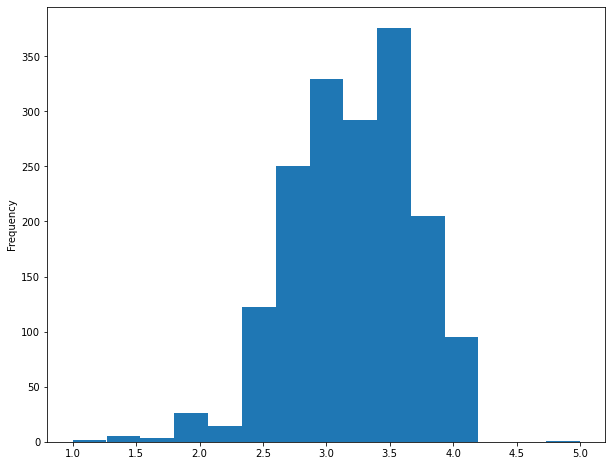

In [22]:
# 초콜릿바 등급의 히스토그램을 그림
# 등급 분포 확인
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
cacao.Rating.plot.hist(ax = ax, bins = 15)

In [23]:
from scipy import stats
stats.kstest(cacao.Rating, cdf='norm')
# 초콜릿바의 등급이 정규분포가 아님을 알 수 있음

KstestResult(statistic=0.9714359145634487, pvalue=0.0)

<AxesSubplot:ylabel='Frequency'>

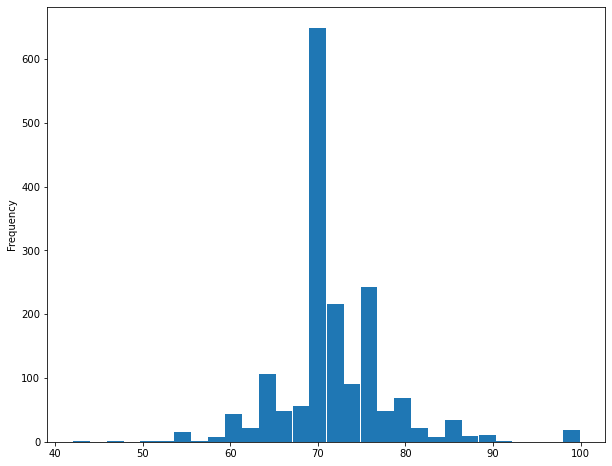

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
cacao.Cocoa_Percent.plot.hist(ax = ax, bins = 30)

In [26]:
# 연도별 가장 등급이 높은 초콜릿바
(
    cacao[['Review_Date', 'Rating', "Company","Company_Location"]]
    .sort_values(['Review_Date', 'Rating'], ascending=[True, False])
    .drop_duplicates(subset='Review_Date')
)

,Review_Date,Rating,Company,Company_Location
242,2006,4.00,Bonnat,France
78,2007,5.00,Amedei,Italy
239,2008,4.00,Bonnat,France
315,2009,4.00,Cacao Sampaka,Spain
56,2010,4.00,Amano,U.S.A.
54,2011,4.00,Amano,U.S.A.
502,2012,4.00,Danta,Guatemala
17,2013,4.00,A. Morin,France
9,2014,4.00,A. Morin,France
117,2015,4.00,Arete,U.S.A.


In [27]:
# 연도별 가장 등급이 높은 초콜릿바의 평균 등급
(
    cacao[['Review_Date', 'Rating', "Company","Company_Location"]]
    .sort_values(['Review_Date', 'Rating'], ascending=[True, False])
    .drop_duplicates(subset='Review_Date')['Rating'].mean()
)

4.062

In [25]:
# 변수 요소들이 많은 것을 알 수 있음
# 상위 몇 개만 시각화
set(cacao.Company_Location)

{'Amsterdam',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'Domincan Republic',
 'Ecuador',
 'Eucador',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Lithuania',
 'Madagascar',
 'Martinique',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Niacragua',
 'Nicaragua',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Russia',
 'Sao Tome',
 'Scotland',
 'Singapore',
 'South Africa',
 'South Korea',
 'Spain',
 'St. Lucia',
 'Suriname',
 'Sweden',
 'Switzerland',
 'U.K.',
 'U.S.A.',
 'Venezuela',
 'Vietnam',
 'Wales'}

In [28]:
top_10_company = cacao.Company.value_counts().index[:10]
top_10_company

Index(['Soma', 'Fresco', 'Bonnat', 'Pralus', 'A. Morin', 'Arete', 'Domori',
       'Hotel Chocolat (Coppeneur)', 'Coppeneur', 'Valrhona'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Company'>

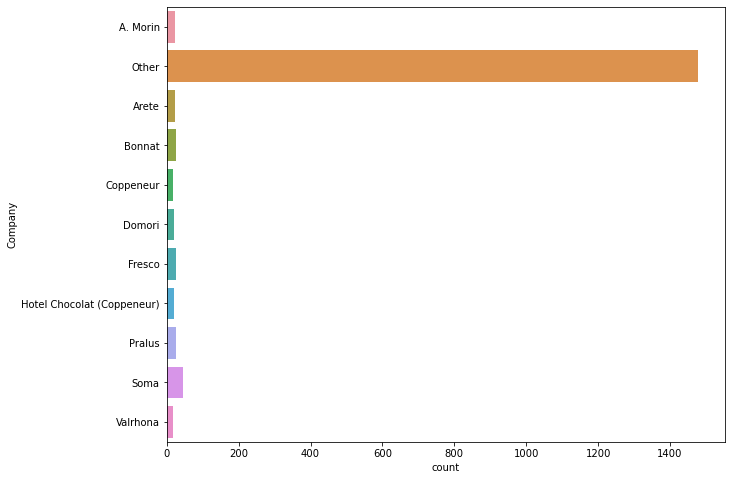

In [29]:
# 초콜릿을 가장 많이 만드는 회사(top10가 아닌 회사는 other로 분류)
# other이 너무 많아서 시각화가 잘 되지 않음
# 따라서 other을 제외하기로 함

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='Company',
              data=(cacao.assign(
                  Company=cacao.Company.where(cacao.Company.isin(top_10_company), 'Other'))
                   )
             )

In [30]:
# 초콜릿 등급이 3보다 높은 것만

rating = (cacao.Rating > 3)
rating_3 = cacao[rating]
rating_3.head()

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Sao Tome
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Peru
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Venezuela


In [31]:
top_6_company_CL = cacao.Company_Location.value_counts().index[:6]
top_6_company_CL

Index(['U.S.A.', 'France', 'Canada', 'U.K.', 'Italy', 'Ecuador'], dtype='object')

<AxesSubplot:xlabel='count', ylabel='Company_Location'>

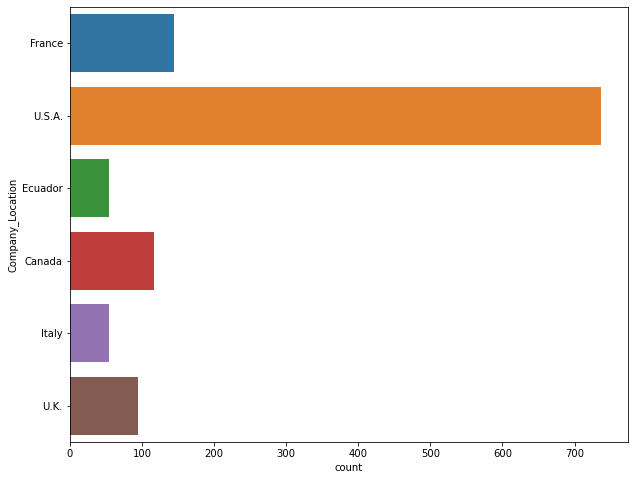

In [33]:
# 초콜릿을 많이 만드는 나라는 U.S.A임을 알 수 있음

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='Company_Location',
              data=(cacao.assign(
                  Company_Location=cacao.Company_Location.where(cacao.Company_Location.isin(top_6_company_CL)))))

In [34]:
# 평점 3이상(만족스러움)인 초콜릿바를 생산한 top6위 회사들
top_6_Rating3_CL = rating_3.Company_Location.value_counts().index[:6]
top_6_Rating3_CL

Index(['U.S.A.', 'France', 'Canada', 'U.K.', 'Australia', 'Italy'], dtype='object')

<AxesSubplot:xlabel='count', ylabel='Company_Location'>

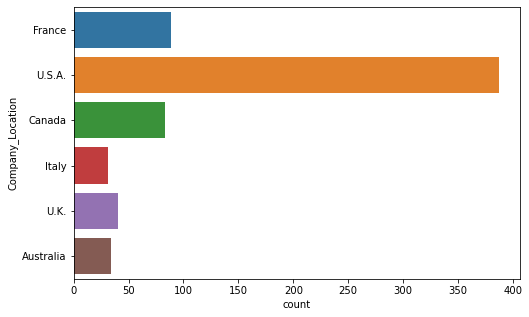

In [72]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(y='Company_Location',
              data=(rating_3.assign(
                  Company_Location=rating_3.Company_Location.where(rating_3.Company_Location.isin(top_6_Rating3_CL)))))

In [36]:
# 초콜릿을 많이 만드는 회사 top10

top_10_company = cacao.Company.value_counts().index[:10]
top_10_company

Index(['Soma', 'Fresco', 'Bonnat', 'Pralus', 'A. Morin', 'Arete', 'Domori',
       'Hotel Chocolat (Coppeneur)', 'Coppeneur', 'Valrhona'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Company'>

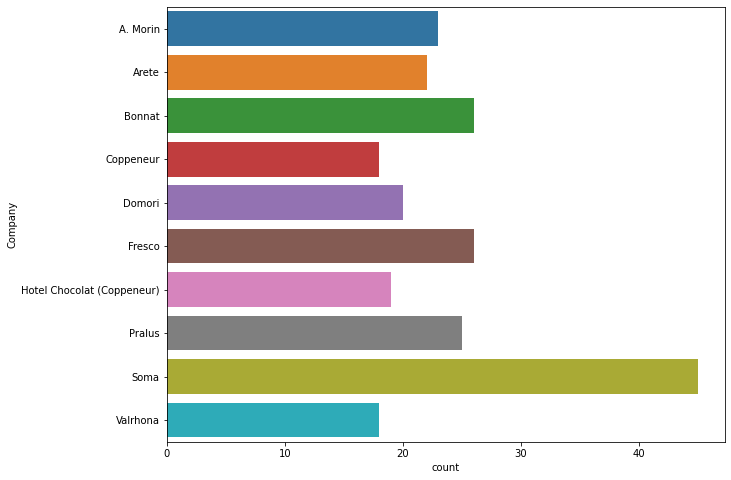

In [37]:
# 초콜릿을 많이 만드는 회사 top10. soma가 가장 많다는 것을 알 수 있음

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='Company',
              data=(cacao.assign(
                  Company=cacao.Company.where(cacao.Company.isin(top_10_company)))
                   )
             )

In [38]:
# 평점 3이상(만족스러움)인 초콜릿바를 생산한 top10위 회사들
top_10_Rating3_C = rating_3.Company.value_counts().index[:10]
top_10_Rating3_C

Index(['Soma', 'Arete', 'Bonnat', 'Fresco', 'A. Morin', 'Pralus', 'Domori',
       'Szanto Tibor', 'Smooth Chocolator, The', 'Valrhona'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Company'>

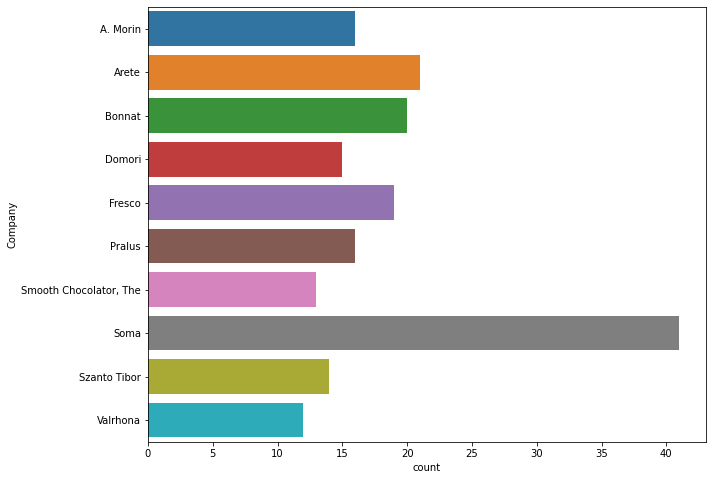

In [39]:
# 평점 3이상(만족스러움)인 초콜릿바를 생산한 top10위 회사들. 일부 회사가 바뀌었다.

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='Company',
              data=(rating_3.assign(
                  Company=rating_3.Company.where(rating_3.Company.isin(top_10_Rating3_C)))))

In [40]:
# 연도별 가장 등급이 높은 초콜릿을 가장 많이 만든 나라는 U.S.A.이다.
(
    cacao[['Review_Date', 'Rating', "Company","Company_Location"]]
    .sort_values(['Review_Date', 'Rating'], ascending=[True, False])
    .drop_duplicates(subset='Review_Date')
    .value_counts('Company_Location')
)

Company_Location
U.S.A.       5
France       4
Spain        1
Italy        1
Guatemala    1
dtype: int64

In [41]:
rating_3

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Sao Tome
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Peru
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Venezuela
...,...,...,...,...,...,...,...,...
1787,Zotter,Santo Domingo,879,2012,70.0,Austria,3.75,Dominican Republic
1788,Zotter,"Kongo, Highlands",883,2012,68.0,Austria,3.25,Congo
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,Peru
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,India


In [42]:
top_10_Rating3_B = rating_3.Broad_Bean_Origin.value_counts().index[:6]
top_10_Rating3_B

Index(['Venezuela', 'Ecuador', 'Peru', 'Madagascar', 'Dominican Republic',
       'Brazil'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Broad_Bean_Origin'>

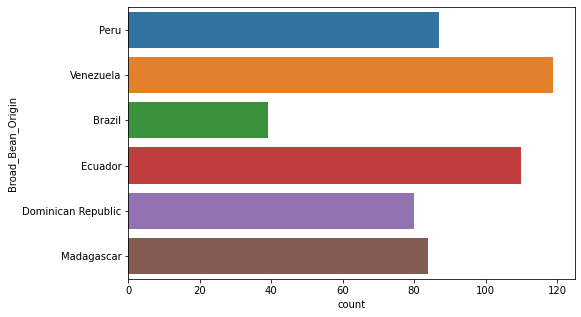

In [71]:
# 3.0 등급 이상인 초콜릿의 상위 6위 콩 산지
# 아프리카에 위치한 마다가스카르를 제외한 나머지 나라들은 다 남아메리카에 위치해 있음.

fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(y='Broad_Bean_Origin',
              data=(rating_3.assign(
                  Broad_Bean_Origin=rating_3.Broad_Bean_Origin.where(rating_3.Broad_Bean_Origin.isin(top_10_Rating3_B)))))

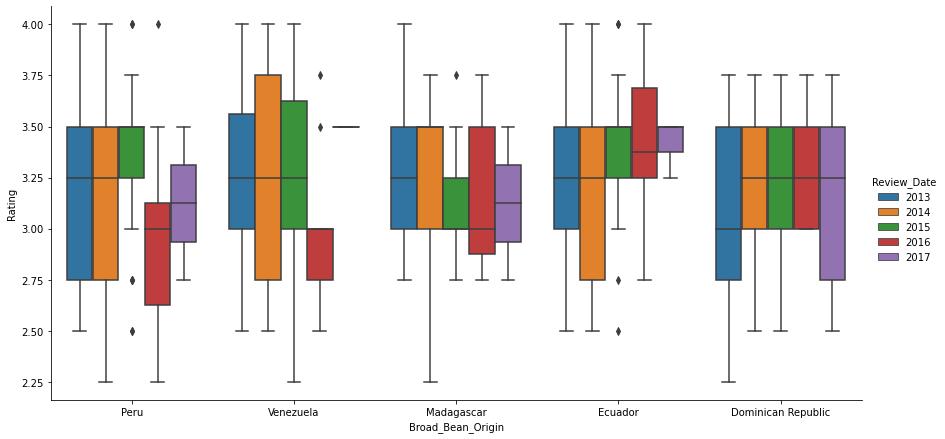

In [82]:
# 최근 5년 x축은 콩 산지, y축은 등급별로 한 박스플롯 
sns.catplot(
    x = 'Broad_Bean_Origin',
    y = 'Rating',
    data=cacao[mask],
    kind='box',
    hue='Review_Date', # 이 부분!
    hue_order=[2013, 2014, 2015, 2016, 2017],
    height=6, aspect=2 #크기조절하는 부분
)

4. 의미 해석 및 가치 도출

4-1. 등급이 3점대 후반인 초콜릿바가 가장 많은 것을 알 수 있다.

4-2. 초콜릿바의 등급이 정규분포가 아님을 알 수 있다.

4-3. 카카오 함유가 70% 정도 되는 초콜릿바가 가장 많은 것을 알 수 있다.

4-4. 연도별 초콜릿바의 가장 높은 등급은 5, 낮은 등급은 3.75이며 평균값은 4.0625이다.

4-5. 평점 3이상(만족스러움)인 초콜릿바를 생산한 top6위 나라와 모든 등급 초콜릿바를 많이 생산하는 top6 나라의 목록은 값이 미세하게 차이가 난다. 또한 top6에서 에콰도르가 오스트레일리아로 바뀐 것을 알 수 있다.

4-6. 평점 3이상(만족스러움)인 초콜릿바를 생산한 top10위 회사들과 모든 등급의 초콜릿바를 생산한 top10위 회사들의 목록을 보면 일부 회사가 다른 것을 알 수 있다. 즉, 많은 종류의 초콜릿바를 만드는 회사가 높은 등급의 초콜릿바를 만드는 것은 아니다.

4-7. 연도별 가장 등급이 높은 초콜릿을 가장 많이 만든 나라는 U.S.A.이다. U.S.A.의 초콜릿바 가공 기술이 뛰어나다고 유추 가능하다.

4-8. 3.0 등급 이상인 초콜릿의 상위 6위 콩 산지를 보면 대부분이 남아메리카에 위치해있다. 따라서 품질이 좋은 콩의 산지는 주로 남아메리카에서 생산된다.